# Unsupervised Machine Learning: Clustering

## I. Data Import

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# current working directory
cwd = os.getcwd()

# get the parent directory path
repo_dir = os.path.dirname(cwd)

In [3]:
# read dataset 'salary-explored.pkl'
df = pd.read_pickle(os.path.join(repo_dir, 'data', 'prepared-data', 'salary-explored.pkl'))

## II. Data Overview

In [4]:
# make sure pandas display all columns
pd.set_option('display.max_columns', None)

# change the display format to non-scientific notation
pd.options.display.float_format = '{:.2f}'.format

In [5]:
# check outputs of df
df.head(3)

,id,survey_year,timestamp,salary_in_usd,country,primary_db,years_of_exp_with_primary_db,other_dbs,employment_status,job_title,manage_staff,years_of_exp_with_data_jobs,number_of_companies_worked_for,number_of_team_members,number_of_company_employees,number_of_db_servers,education,education_is_computer_related,certifications,hours_worked_per_week,wfh_days_per_week,pop_of_largest_city_within_20_miles,employment_sector,looking_for_another_job,career_plans_this_year,other_job_duties,tasks_perfomed,month,salary_category
0,0,2017,2017-01-05 05:10:20,200000.00,United States,Microsoft SQL Server,10,MySQL/MariaDB,Full time employee,DBA,No,5,Not Asked,2,Not Asked,350,Masters,No,"Yes, and they're currently valid",45,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,1,150K-200K
1,1,2017,2017-01-05 05:26:23,61515.00,United Kingdom,Microsoft SQL Server,15,"Oracle, PostgreSQL",Full time employee,DBA,No,3,Not Asked,1,Not Asked,40,None (no degree completed),Not Provided,"No, I never have",35,2,Not Asked,Private business,No,Not Asked,Not Asked,Not Asked,1,50K-100K
2,2,2017,2017-01-05 05:32:57,95000.00,Germany,Microsoft SQL Server,5,"Oracle, MySQL/MariaDB, Informix",Full time employee,Other,Yes,25,Not Asked,2,Not Asked,100,Masters,Yes,"Yes, but they expired",45,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,1,50K-100K


In [6]:
# check number of rows and columns
df.shape

(6860, 29)

In [7]:
# check columns
df.columns

Index(['id', 'survey_year', 'timestamp', 'salary_in_usd', 'country',
       'primary_db', 'years_of_exp_with_primary_db', 'other_dbs',
       'employment_status', 'job_title', 'manage_staff',
       'years_of_exp_with_data_jobs', 'number_of_companies_worked_for',
       'number_of_team_members', 'number_of_company_employees',
       'number_of_db_servers', 'education', 'education_is_computer_related',
       'certifications', 'hours_worked_per_week', 'wfh_days_per_week',
       'pop_of_largest_city_within_20_miles', 'employment_sector',
       'looking_for_another_job', 'career_plans_this_year', 'other_job_duties',
       'tasks_perfomed', 'month', 'salary_category'],
      dtype='object')

In [8]:
# create a subset of df with only numerical columns
sub = df[['salary_in_usd', 'years_of_exp_with_primary_db', 'hours_worked_per_week']]

## III. Clustering

### III.1. Clustering 

#### III.1.1. Elbow technique

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
# creates a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))]

In [11]:
score

[-17495359470707.438,
 -10610783289861.838,
 -5246886385521.483,
 -3358517823541.036,
 -2240906669636.567,
 -1588978761922.7988,
 -1212189778088.327,
 -965841262405.104,
 -770474988801.3069]

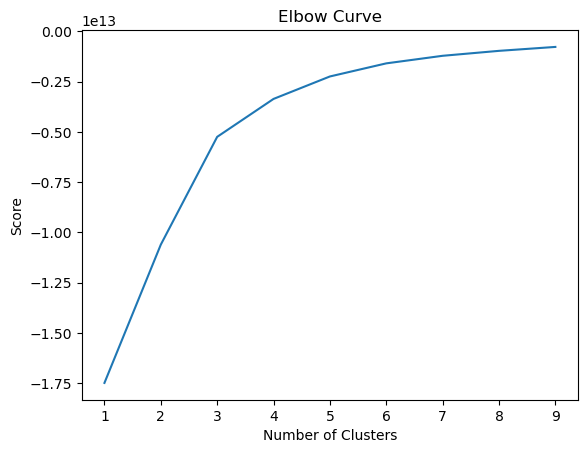

In [12]:
# Plot the elbow curve using PyLab
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [13]:
# create the k-means object
kmeans = KMeans(n_clusters = 3) 

In [14]:
# fit the k-means object to the data
kmeans.fit(sub)

KMeans(n_clusters=3)

In [15]:
sub['clusters'] = kmeans.fit_predict(sub)

C:\Users\Ansgar.S\AppData\Local\Temp\ipykernel_14964\3683309691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [16]:
sub.head(3)

,salary_in_usd,years_of_exp_with_primary_db,hours_worked_per_week,clusters
0,200000.00,10,45,0
1,61515.00,15,35,1
2,95000.00,5,45,0


In [17]:
sub['clusters'].value_counts()

1    3638
0    3203
2      19
Name: clusters, dtype: int64

#### III.1.2. K-means clustering

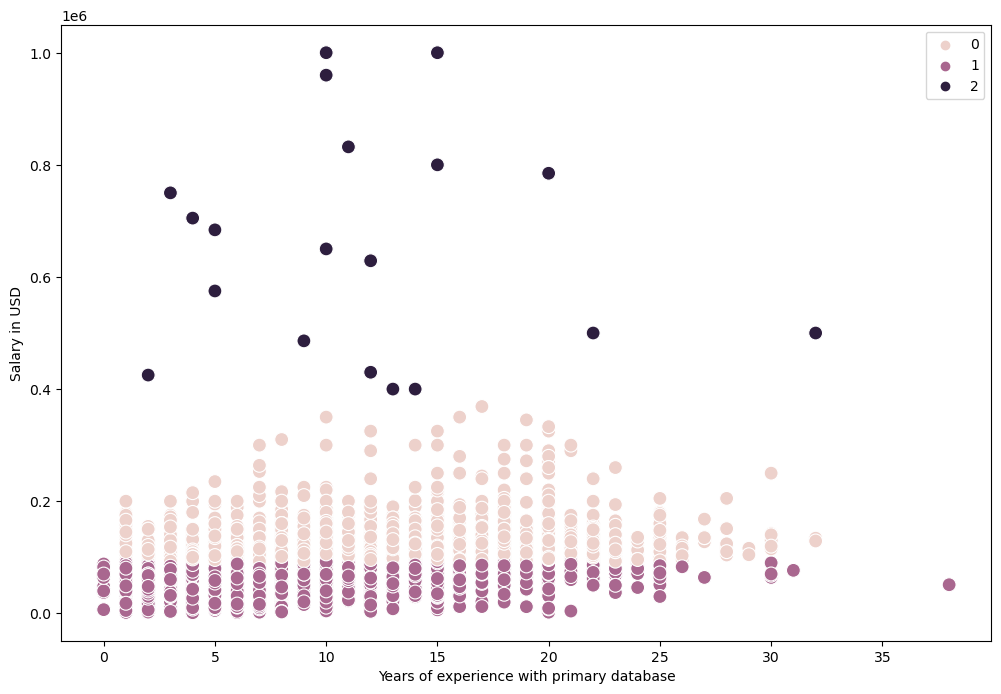

In [18]:
# plot the clusters for the 'years_of_exp_with_primary_db' and ''salary_in_usd' variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['years_of_exp_with_primary_db'], y=sub['salary_in_usd'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Years of experience with primary database') # Label x-axis.
plt.ylabel('Salary in USD') # Label y-axis.
plt.show()

**Observation:**

The clusters stack on top of each other, indicating that there is not enough separation in the variables being used to cluster the data. In this case, the scatterplot shows that there is not a clear separation between *Years of experience with primary database* and *Salary in USD*.

The fact that clusters "0" and "1" are directly on top of each other suggests that there is little difference between the salary and experience levels of the individuals in those clusters.

The small number of data points in cluster "2" at the top of the scatterplot suggest that these individuals have high salaries but may not necessarily have a lot of experience with primary databases. Overall, the clustering result indicates that there is not a clear pattern in the data when looking at years of experience with primary database and salary in USD.

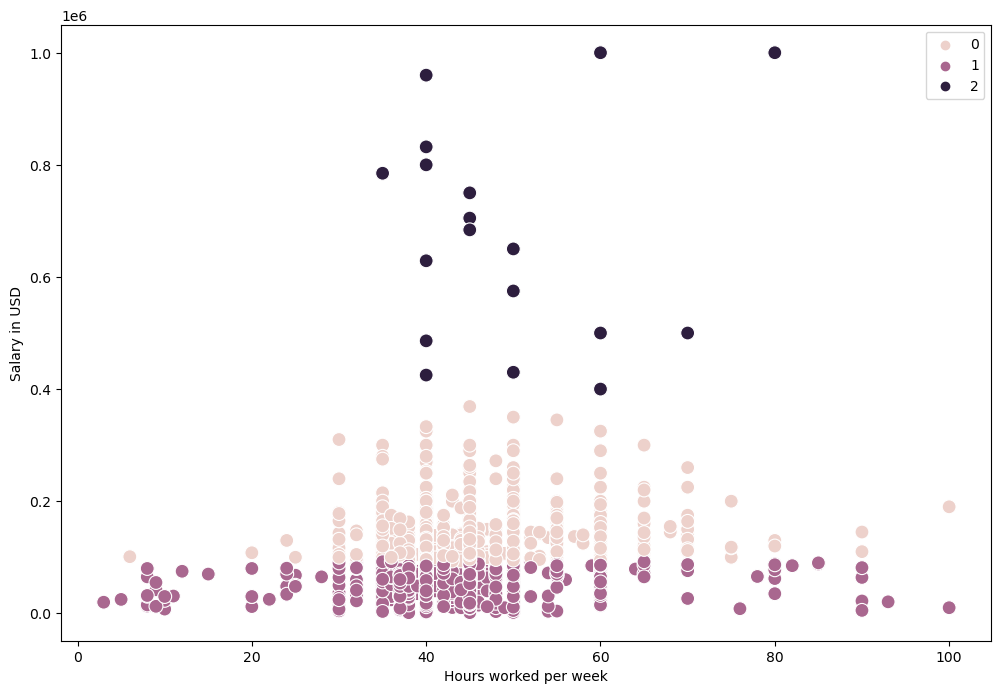

In [19]:
# plot the clusters for the 'hours_worked_per_week' and 'salary_in_usd' variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['hours_worked_per_week'], y=sub['salary_in_usd'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Hours worked per week') 
plt.ylabel('Salary in USD') 
plt.show()

**Observation:**

Similar to the scatterplot above, here the clusters stack on top of each other, indicating that there is not enough separation between *Hours worked per week* and *Salary in USD*.

#### III.1.3. Aggregrations

In [57]:
sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\Ansgar.S\AppData\Local\Temp\ipykernel_14964\749661046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'


In [58]:
sub.groupby('cluster').agg({'salary_in_usd':['mean', 'median'], 
                         'years_of_exp_with_primary_db':['mean', 'median'], 
                         'hours_worked_per_week':['mean', 'median']})

salary_in_usd           years_of_exp_with_primary_db         \
                     mean    median                         mean median   
cluster                                                                   
dark purple     658467.79 650000.00                        11.79  11.00   
pink            122858.01 115000.00                        13.44  14.00   
purple           62793.30  66000.00                         8.47   7.00   

            hours_worked_per_week         
                             mean median  
cluster                                   
dark purple                 50.00  45.00  
pink                        44.43  44.00  
purple                      41.93  40.00

### III.2. Performance improvement: Clustering without outliers

In [45]:
# remove outliers
# from erlier excersices, outliers in column salary_in_usd are values higher than 250000
# outliers in column hours_worked_per_week are values higher than 60 or lower than 30
sub_test = sub[(sub['salary_in_usd'] < 250000) & (sub['hours_worked_per_week'] >= 30) & (sub['hours_worked_per_week'] <= 60)]

#### III.2.1. Elbow technique

In [46]:
num_cl_2 = range(1, 10) # Defines the range of potential clusters in the data.
kmeans_2 = [KMeans(n_clusters=i) for i in num_cl_2] # Defines k-means clusters in the range assigned above.

In [47]:
# creates a score that represents a rate of variation for the given cluster option
score_2 = [kmeans_2[i].fit(sub_test).score(sub_test) for i in range(len(kmeans_2))]

In [48]:
score_2

[-8848576834057.45,
 -3299999357379.8096,
 -1797357169651.7502,
 -1127983176207.3755,
 -732327442207.2615,
 -540728327033.2938,
 -398550282970.41284,
 -300245721064.534,
 -240110141750.73776]

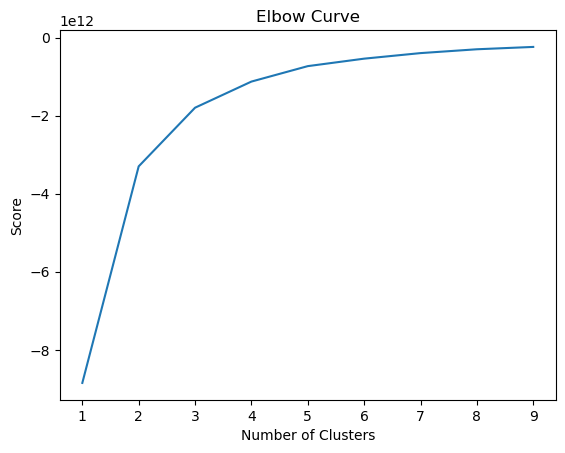

In [49]:
# Plot the elbow curve using PyLab
pl.plot(num_cl_2,score_2)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [50]:
# create the k-means object
kmeans_2 = KMeans(n_clusters = 3) 

In [51]:
# fit the k-means object to the data
kmeans_2.fit(sub_test)

KMeans(n_clusters=3)

In [52]:
sub_test['clusters'] = kmeans_2.fit_predict(sub_test)

C:\Users\Ansgar.S\AppData\Local\Temp\ipykernel_14964\2623935135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_test['clusters'] = kmeans_2.fit_predict(sub_test)


In [53]:
sub_test.head(3)

,salary_in_usd,years_of_exp_with_primary_db,hours_worked_per_week,clusters
0,200000.00,10,45,2
1,61515.00,15,35,1
2,95000.00,5,45,0


In [54]:
sub_test['clusters'].value_counts()

0    3077
1    2132
2    1488
Name: clusters, dtype: int64

#### III.2.2. K-means clustering

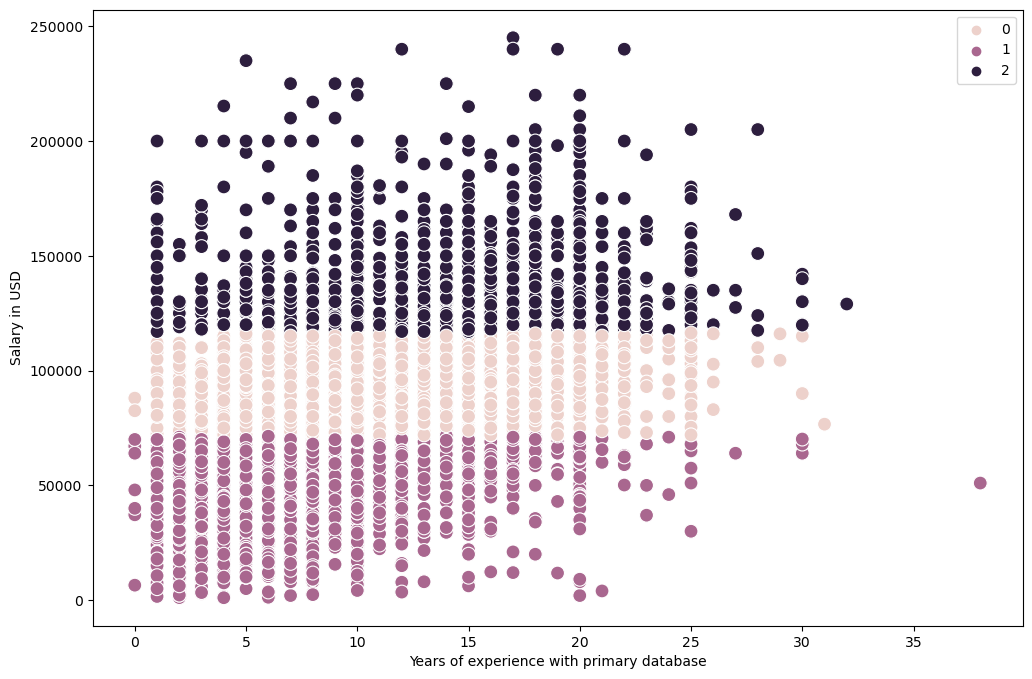

In [55]:
# plot the clusters for the 'years_of_exp_with_primary_db' and ''salary_in_usd' variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_test['years_of_exp_with_primary_db'], y=sub_test['salary_in_usd'], hue=kmeans_2.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Years of experience with primary database') # Label x-axis.
plt.ylabel('Salary in USD') # Label y-axis.
plt.show()

**Observation:**

It seems that the removal of salaries above 250,000 has resulted in a narrower range of salary values, which may have caused the clusters to overlap more closely. The fact that all three clusters are stacked on top of each other suggests that there is not much differentiation in terms of salary and hours worked per week among the data points. It is also interesting to note that cluster "2" now has more data points than before, which could suggest that the removal of high salaries has affected the distribution of data points in this cluster. Overall, the updated scatterplot suggests that the removal of high salaries has had an impact on the clustering results, but more analysis would be needed to fully understand the implications.

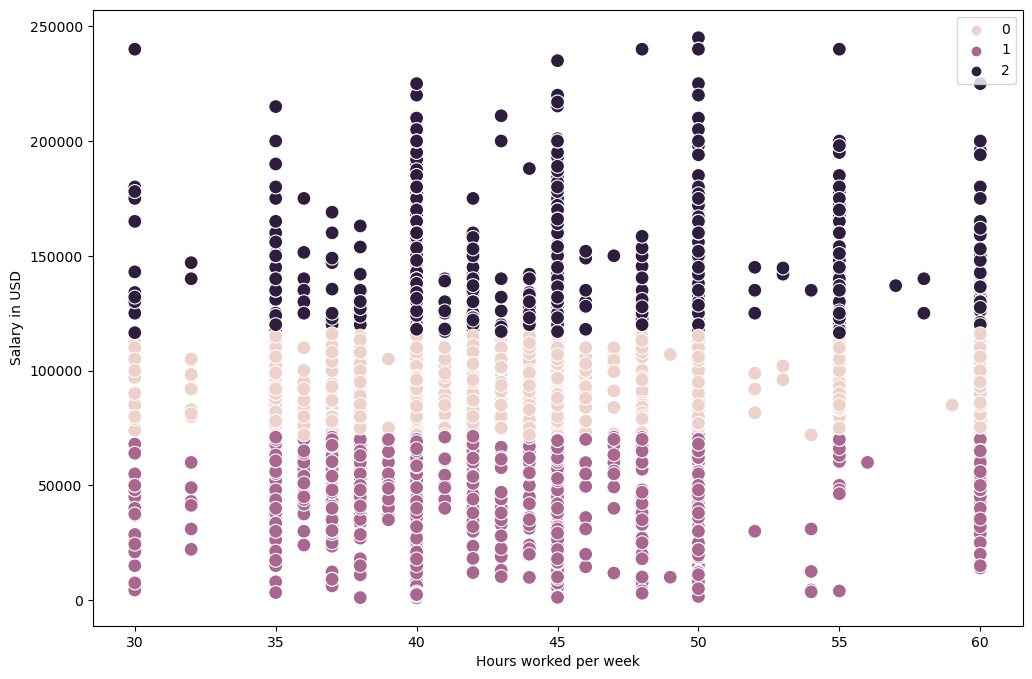

In [56]:
# plot the clusters for the 'hours_worked_per_week' and 'salary_in_usd' variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_test['hours_worked_per_week'], y=sub_test['salary_in_usd'], hue=kmeans_2.labels_, s=100)

ax.grid(False) 
plt.xlabel('Hours worked per week') 
plt.ylabel('Salary in USD') 
plt.show()

#### III.2.3. Aggregrations

In [59]:
sub_test.loc[sub_test['clusters'] == 2, 'cluster'] = 'dark purple'
sub_test.loc[sub_test['clusters'] == 1, 'cluster'] = 'purple'
sub_test.loc[sub_test['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\Ansgar.S\AppData\Local\Temp\ipykernel_14964\50970479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_test.loc[sub_test['clusters'] == 2, 'cluster'] = 'dark purple'


In [60]:
sub_test.groupby('cluster').agg({'salary_in_usd':['mean', 'median'], 
                         'years_of_exp_with_primary_db':['mean', 'median'], 
                         'hours_worked_per_week':['mean', 'median']})

salary_in_usd           years_of_exp_with_primary_db         \
                     mean    median                         mean median   
cluster                                                                   
dark purple     138960.62 132000.00                        14.61  15.00   
pink             93785.92  94000.00                        11.05  10.00   
purple           49834.33  54000.00                         7.70   6.00   

            hours_worked_per_week         
                             mean median  
cluster                                   
dark purple                 44.58  45.00  
pink                        43.15  40.00  
purple                      41.40  40.00

## IV. Reflection

### IV.1. Reflection on k-means clustering result

The insight from the data analysis is that the k-means algorithm was unable to create clear and distinct clusters from the given data.

The three clusters that were formed were overlapping and not entirely separate, indicating that the variables used for clustering may not be the best predictors of salary. However, based on the descriptions of the clusters, it can be concluded that higher salaries are associated with moderate experience and longer working hours, while lower salaries are associated with less experience.

These findings suggest that other variables may need to be considered to create more accurate and distinct clusters for predicting salary.

### IV.2. Reflection on k-means clustering result without extreme values

After removing the extreme values, we can see that the mean and median salaries for all clusters have decreased significantly. Cluster dark purple still has the highest mean and median salaries among the three clusters, followed by cluster pink and then cluster purple.

In terms of years of experience with primary database, cluster dark purple has the highest mean and median values, which suggests that this cluster contains more experienced professionals. Cluster pink has lower mean and median values for years of experience compared to cluster dark purple, while cluster purple has the lowest mean and median values, indicating that it has the least experienced professionals.

Regarding hours worked per week, all three clusters have similar mean and median values, with cluster dark purple having a slightly higher mean value. It is important to note that the difference in hours worked per week between the clusters is relatively small.

### IV.3. Conclusion

**Based on the clustering analysis, we can draw the following conclusions:**

- Years of experience with primary database and salary in USD are important factors in determining the clusters.

- The number of hours worked per week does not seem to have a significant impact on the clustering.

- The cleaned data shows that the clusters are more evenly distributed without outliers.

Overall, these clustering results can be useful for identifying different segments of the data professional population and understanding how they differ in terms of salary and experience. In future steps of the analytics pipeline, we could investigate other factors that may contribute to these differences, such as education level, job title, and location.